In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
import scipy.odr, scipy.special, scipy.stats 
import scipy.signal as signal
import sys

import matplotlib.pyplot as plt
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (10, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

#Simple sintonizado, una etapa.


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Respuesta en frecuencia de un Doble Sintonizado

El siguiente código permite graficar el comportamiento de un filtro doble sintonizado. 

Para el analisis se emplea la respuesta en frecuencia :

# $\frac{v_o}{i_g} = \frac{- y_{21}  }{y_{1}y_{2} - y_{12}y_{21}  }$ 

# $\frac{v_o}{i_g} = \frac{- y_{21}  }{(g_1+S C_1+\frac{1}{sL_1})(g_2+S C_2+\frac{1}{sL_2}) - y_{12}y_{21}  }$ 

# $\frac{v_o}{i_g} = \frac{- S^2 y_{21}  }{\frac{C_1}{S}(S^2+S \frac{w_o}{Q_1} +w_o^2)\frac{C_2}{S}(S^2+S \frac{w_o}{Q_2} +w_o^2) - y_{12}y_{21}  }$ 

# $\frac{v_o}{i_g} = \frac{- S^2 y_{21}  }{C_1 C_2 (S^2+S \frac{w_o}{Q} +w_o^2)^2 - \frac{y_{12}y_{21} }{C_1 C_2} S^2 }$ 

# $\frac{v_o}{i_g} = \frac{- S^2 y_{21}  }{S^4 C_1 C_2 + S^3 (C_1 g_2 + C_2 g_1 + C_p gm) + S^2 (g_1 g_2 + \frac{C_1}{L_2}+\frac{C_2}{L_1}) + S (\frac{g_2}{L_1}+\frac{g_1}{L_2}) + \frac{1}{L_1 L_2 } }$ 

In [2]:
cp  = 1e-5


g1 = 1e-2
g2 = 1e-3
Q  = 5
wo = 100
gm  = 0.1 

L1 = 1/(wo*Q*g1)
C1 = 1/(wo**2*L1)

L2 = 1/(wo*Q*g2)
C2 = 1/(wo**2*L2)


num=[  cp, -gm,0,0     ];   
den=[ C1*C2-cp**2, C1*g2+C2*g1+gm*cp, g1*g2+C2/L1+C1/L2, g2/L1+g1/L2,1/(L1*L2)];

sys1 = signal.lti(num,den);  #H($) =  $ (Gvo*wo/Q) / ($**2+$wo/Q+1) 

w = np.linspace(wo*0.5,wo*5,1e3)  
w, H = signal.freqresp(sys1, w)

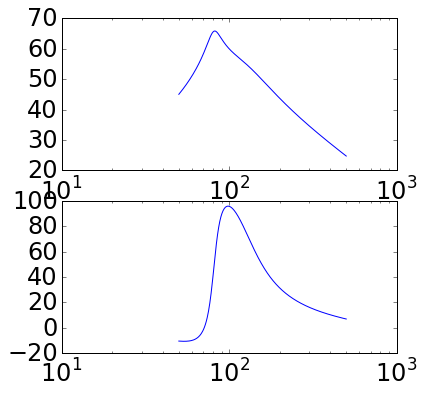

In [3]:
# bode
w, mag, phase = signal.bode(sys1,w) # Diagrama de bode: frecuencias, magnitud y fase


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.semilogx(w, mag) # Eje x logarítmico
#ax1.set_xlim([5e2,5e3])
#ax1.set_ylim([-25,0])
ax2.semilogx(w, phase) # Eje x logarítmico
#ax2.set_xlim([5e2,5e3])

plt.show()

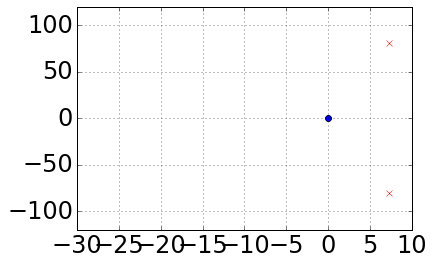

In [4]:
plt.figure()
plt.plot(sys1.zeros.real, sys1.zeros.imag, 'o')
plt.plot(sys1.poles.real, sys1.poles.imag, 'rx')
plt.grid()
plt.xlim([-30,10])
plt.ylim([-120,120])
plt.show()


In [19]:
g1 = 1e-2
g2 = 1e-3
Q  = 5
wo = 100
gm  = 0.1 



def APBFREQ(c ):
    cp = c * 5e-12
    L1 = 1/(wo*Q*g1)
    C1 = 1/(wo**2*L1)
    L2 = 1/(wo*Q*g2)
    C2 = 1/(wo**2*L2)
    
    num=[  cp, -gm,0,0     ];   
    den=[ C1*C2-cp**2, C1*g2+C2*g1+gm*cp, g1*g2+C2/L1+C1/L2, g2/L1+g1/L2,1/(L1*L2)];
    sys1 = signal.lti(num,den);  #H($) =  $ (Gvo*wo/Q) / ($**2+$wo/Q+1) 
    w = np.linspace(wo*0.5,wo*5,1e3) 
    w, mag, phase = signal.bode(sys1,w) # Diagrama de bode: frecuencias, magnitud y fase
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
    ax1.semilogx(w, mag) # Eje x logarítmico
    ax1.set_xlim([80,120])
    ax1.set_ylim([60,100])
    ax2.semilogx(w, phase) # Eje x logarítmico
    ax2.set_xlim([80,120])
    plt.show()

def APBFZP(c ):
    cp = c * 5e-12
    L1 = 1/(wo*Q*g1)
    C1 = 1/(wo**2*L1)
    L2 = 1/(wo*Q*g2)
    C2 = 1/(wo**2*L2)
    
    num=[  cp, -gm,0,0     ];   
    den=[ C1*C2-cp**2, C1*g2+C2*g1+gm*cp, g1*g2+C2/L1+C1/L2, g2/L1+g1/L2,1/(L1*L2)];
    sys1 = signal.lti(num,den);  #H($) =  $ (Gvo*wo/Q) / ($**2+$wo/Q+1) 
    w = np.linspace(wo*0.5,wo*5,1e3) 
    w, mag, phase = signal.bode(sys1,w) # Diagrama de bode: frecuencias, magnitud y fase
    plt.figure()
    plt.plot(sys1.zeros.real, sys1.zeros.imag, 'o')
    plt.plot(sys1.poles.real, sys1.poles.imag, 'rx')
    plt.grid()
    plt.xlim([-30,10])
    plt.ylim([-120,120])
    plt.show()


In [20]:
interact(APBFZP, c=(1,1e6,1) )

interactive(children=(FloatSlider(value=500000.0, description='c', max=1000000.0, min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.APBFZP>

In [21]:
interact(APBFREQ, c=(1,1e6,1) )

interactive(children=(FloatSlider(value=500000.0, description='c', max=1000000.0, min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.APBFREQ>